In [1]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Conectar no Google Drive para carregar arquivo

In [0]:
from google.colab import drive
drive.mount('/drive')

import os
workdir_path = '/drive/My Drive/'
os.chdir(workdir_path)


Mounted at /drive


# Carrengando arquivo e verificando Nulos

In [0]:
data = pd.read_csv('reclamacoes2.txt',encoding='windows-1252',sep =';')
data['serviço'].tail
#data['serviço'].isnull().sum()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-150-2f1dbd3b9eac>", line 1, in <module>
    data = pd.read_csv('reclamacoes2.txt',encoding='windows-1252',sep =';')
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 676, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 448, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 880, in __init__
    self._make_engine(self.engine)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 1114, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 1874, in __init__
    src = open(src, "

OSError: ignored

# Criando dataframe Pandas com a coluna de trabalho

In [0]:
data_serv = pd.DataFrame()
data_serv['servico'] = data['serviço']

# Convertendo caracteres para minúsculo

In [0]:
import re

to_lower = lambda x: x.lower()
data_serv['servico2'] = data_serv.servico.map(to_lower)

data_serv['servico2'].head()

0                                     outros contratos
1    telefonia fixa ( plano de expansão / compra e ...
2                                     energia elétrica
3    estacionamento ( particular, supermercado, sho...
4    telefonia fixa ( plano de expansão / compra e ...
Name: servico2, dtype: object

# Realizando Tokenização

In [0]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize

data_serv['tokens'] = data_serv.servico2.map(word_tokenize)

data_serv.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,servico,servico2,tokens
0,Outros Contratos,outros contratos,"[outros, contratos]"
1,Telefonia Fixa ( Plano de Expansão / Compra e ...,telefonia fixa ( plano de expansão / compra e ...,"[telefonia, fixa, (, plano, de, expansão, /, c..."
2,Energia Elétrica,energia elétrica,"[energia, elétrica]"
3,"Estacionamento ( Particular, Supermercado, Sho...","estacionamento ( particular, supermercado, sho...","[estacionamento, (, particular, ,, supermercad..."
4,Telefonia Fixa ( Plano de Expansão / Compra e ...,telefonia fixa ( plano de expansão / compra e ...,"[telefonia, fixa, (, plano, de, expansão, /, c..."


# Retirando StopWords e expressões baseada em dicionário gerado

In [0]:
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')

dicionario = {'(',')','/',' ',' ,','.','etc',',',' '}

parser = lambda x: [y for y in x if y not in stop_words and y not in dicionario]
data_serv['tokens2'] = data_serv.tokens.apply(parser)

data_serv.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,servico,servico2,tokens,tokens2
0,Outros Contratos,outros contratos,"[outros, contratos]","[outros, contratos]"
1,Telefonia Fixa ( Plano de Expansão / Compra e ...,telefonia fixa ( plano de expansão / compra e ...,"[telefonia, fixa, (, plano, de, expansão, /, c...","[telefonia, fixa, plano, expansão, compra, ven..."
2,Energia Elétrica,energia elétrica,"[energia, elétrica]","[energia, elétrica]"
3,"Estacionamento ( Particular, Supermercado, Sho...","estacionamento ( particular, supermercado, sho...","[estacionamento, (, particular, ,, supermercad...","[estacionamento, particular, supermercado, sho..."
4,Telefonia Fixa ( Plano de Expansão / Compra e ...,telefonia fixa ( plano de expansão / compra e ...,"[telefonia, fixa, (, plano, de, expansão, /, c...","[telefonia, fixa, plano, expansão, compra, ven..."


# Realizando STEM nos tokens -> Sem necessidade - Retirar esta célula

In [0]:
from nltk.stem import SnowballStemmer

dic_stem = SnowballStemmer('portuguese')

stem_tokens = lambda x: [dic_stem.stem(y) for y in x]
data_serv['tokens3'] = data_serv.tokens2.apply(stem_tokens)
data_serv.head()


# Compondo texto para a WordCloud

In [0]:

#data_serv['tokens2'].isnull().sum()
lista = sum(data_serv['tokens2'].tolist(),[])
lista2 = " ".join([text for text in lista])

# Gerando WordCloud

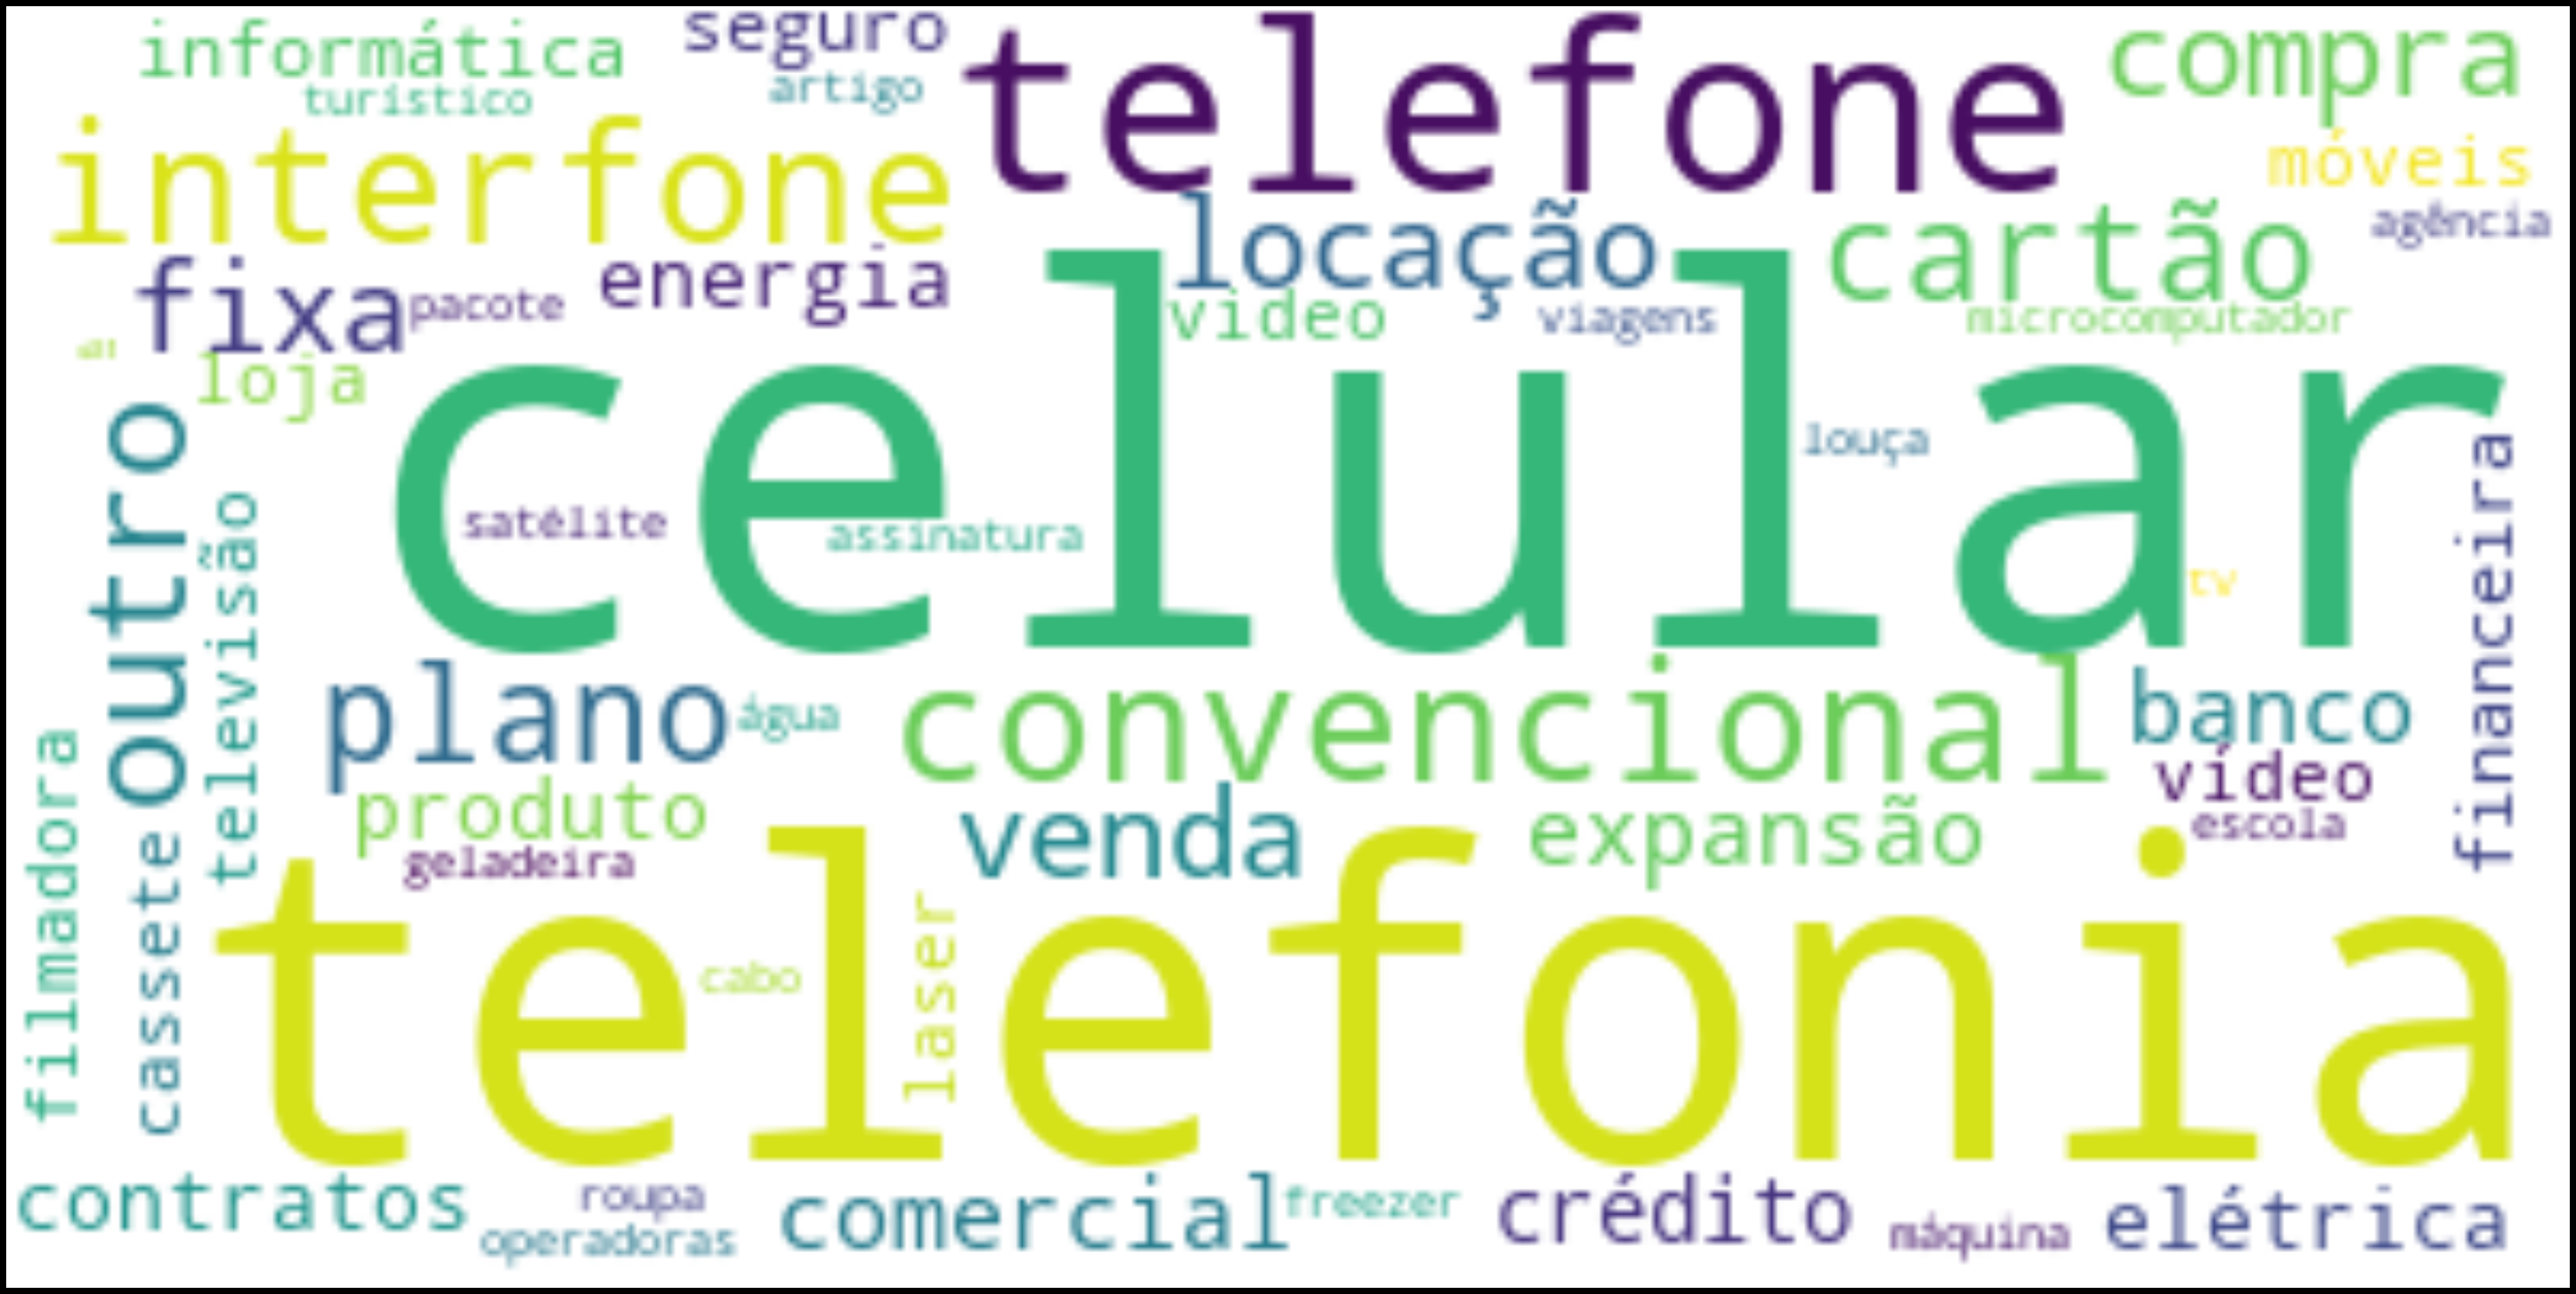

In [0]:

wordcloud_serv = WordCloud(collocations=False, background_color = "white", max_words = 50).generate(lista2)

plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_serv, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Servicos_wordcloud.png")
plt.show()